In [2]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
from pyproj import Proj, transform

## Read in the total final perimeter from August Complex and plot

In [3]:
shapefile = gpd.read_file("/data2/lthapa/ML_daily/August_Complex_2020/August_Complex_2020/MODIS_totalperimeter_August_2020.shp")
print(shapefile)
final_perim = shapefile['geometry'].iloc[0]
print(final_perim.bounds[0], final_perim.bounds[0]*.01)

PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Equidistant_Conic"],PARAMETER["latitude_of_center",39],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",33],PARAMETER["standard_parallel_2",45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
-2299337.0956052653 -22993.370956052655


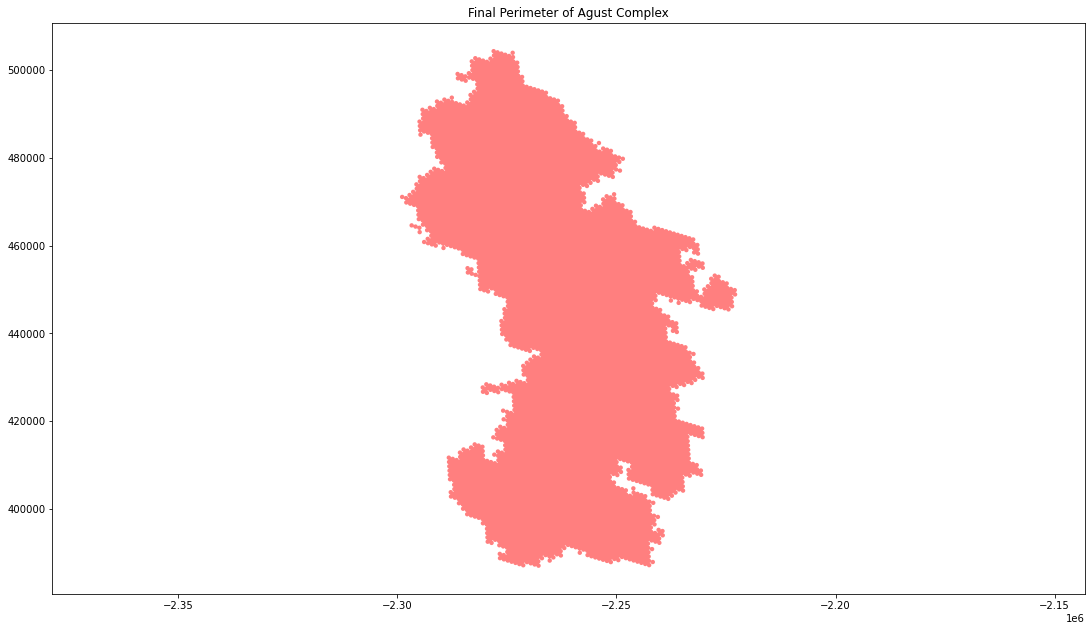

In [5]:
fig, axs = plt.subplots()
fig.set_size_inches(18.5, 10.5)
axs.set_aspect('equal', 'datalim')

for geom in final_perim.geoms:
    xs,ys = geom.exterior.xy
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')
    plt.title('Final Perimeter of Agust Complex')
plt.show()

In [34]:
x,y = shapefile['geometry'].iloc[0].exterior.xy
plt.plot(x,y)

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

## Look at the per detction/overpass fire growth

In [20]:
shapefile = gpd.read_file("/data2/lthapa/ML_daily/August_Complex_2020/August_Complex_2020/MODIS_perdetect_growthonly_August_2020.shp")
print(shapefile)
geom = shapefile['geometry'].iloc[0]
print(geom)

      Fire_ID              DateTim Source            FRP  pixels  \
0    2020_690  2020-08-17 01:30:00    MYD     445.600007       8   
1    2020_690  2020-08-17 22:30:00    MOD    7637.300115      44   
2    2020_690  2020-08-18 10:30:00    MOD    1682.200025      24   
3    2020_690  2020-08-19 10:30:00    MOD   41881.500628     125   
4    2020_690  2020-08-19 13:30:00    MYD  104777.801572     173   
..        ...                  ...    ...            ...     ...   
197  2020_690  2020-10-16 10:30:00    MOD      46.000001       4   
198  2020_690  2020-10-16 13:30:00    MYD     217.400003       9   
199  2020_690  2020-10-16 22:30:00    MOD     353.200005       8   
200  2020_690  2020-10-17 13:30:00    MYD     277.800004       6   
201  2020_690  2020-10-18 13:30:00    MYD     315.000005       6   

          Grwth_A  wthn_bn                                           geometry  
0    1.576021e+03        1  MULTIPOLYGON (((-122.78349 39.68307, -122.7837...  
1    7.251640e+03      

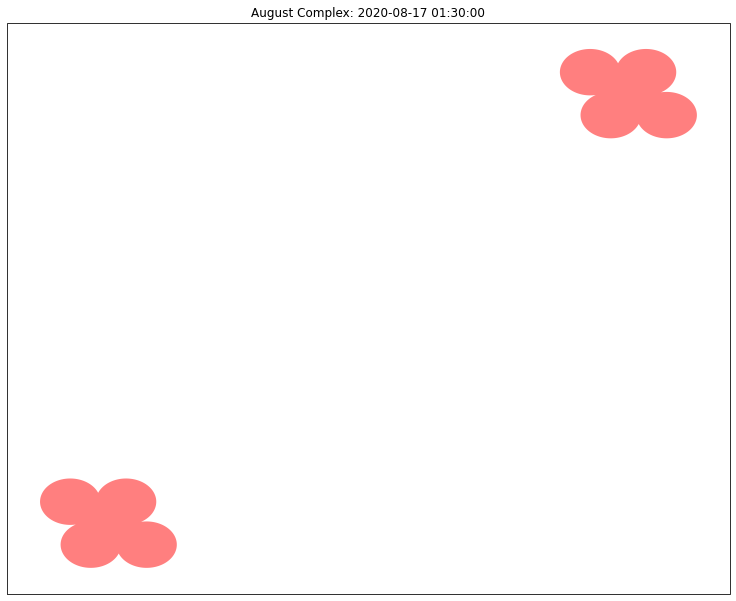

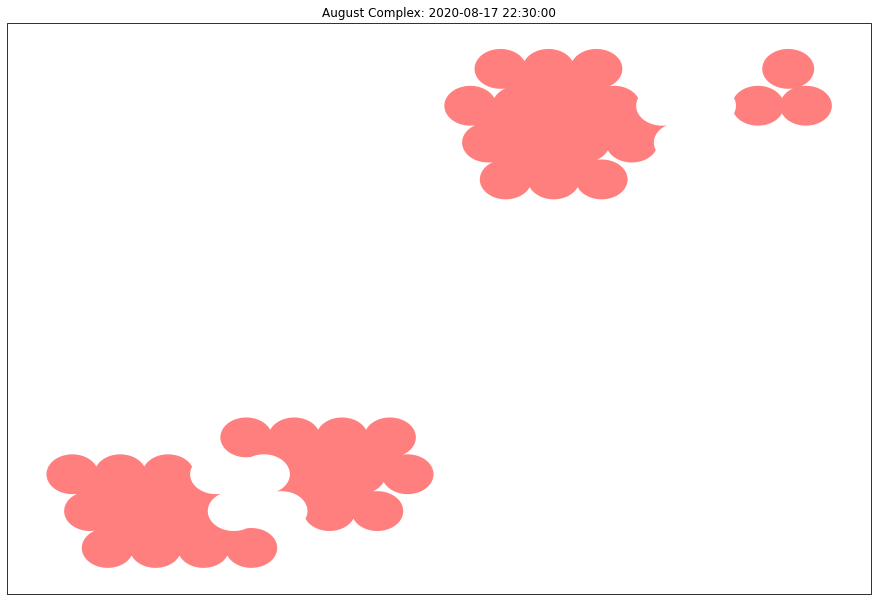

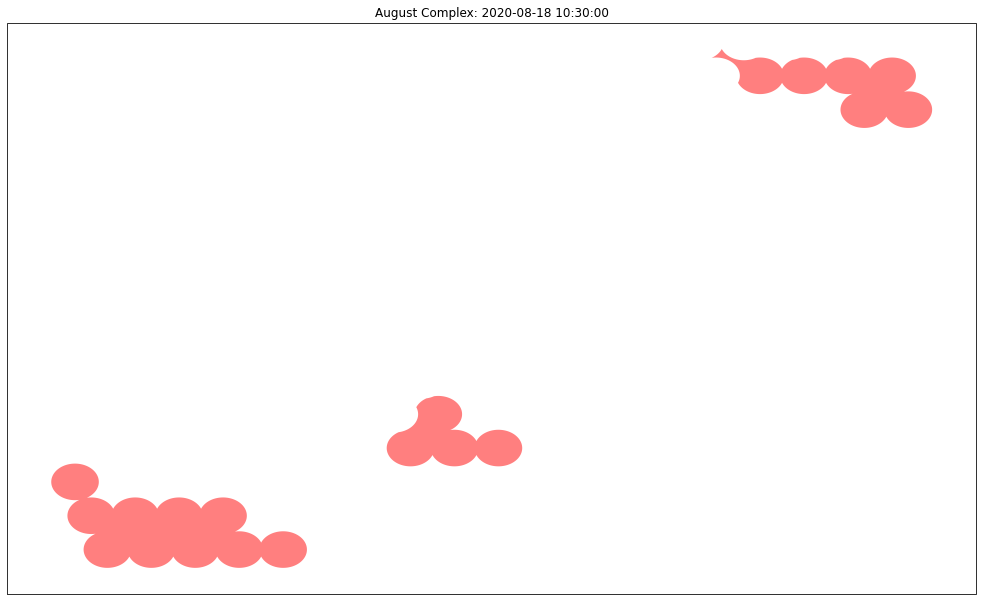

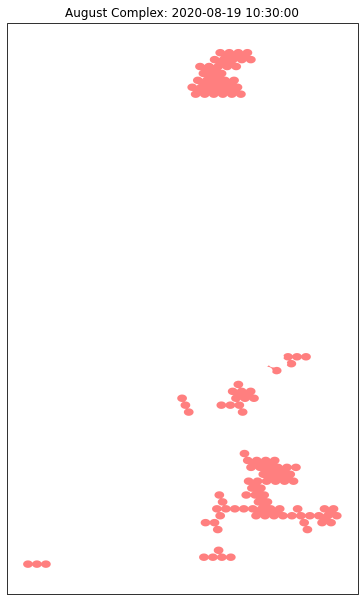

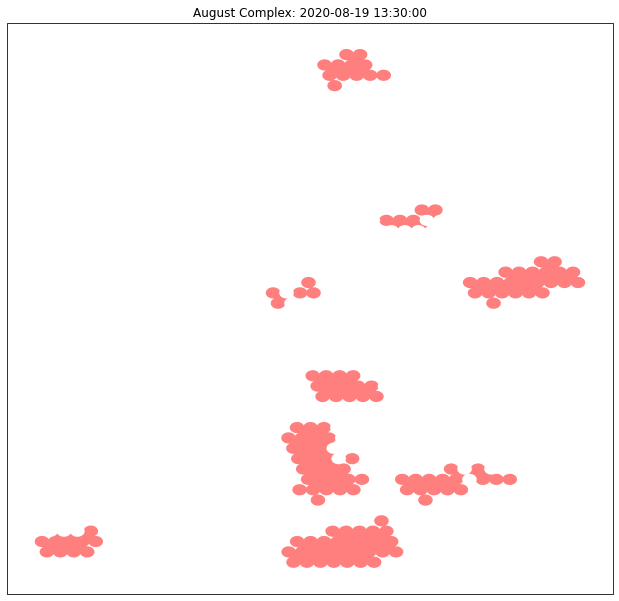

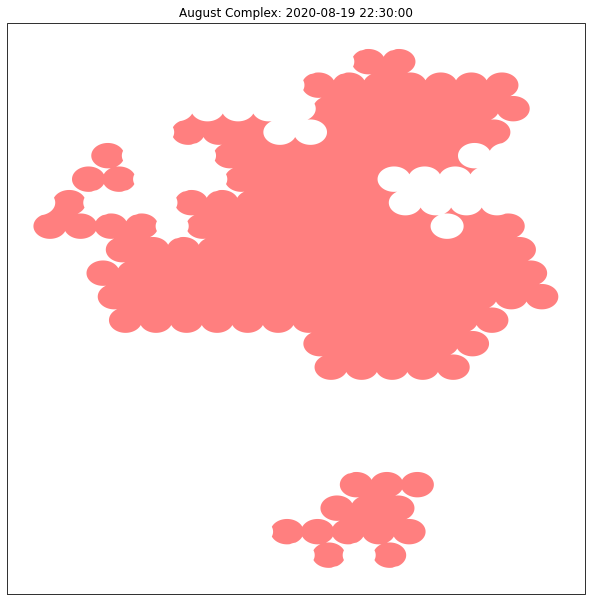

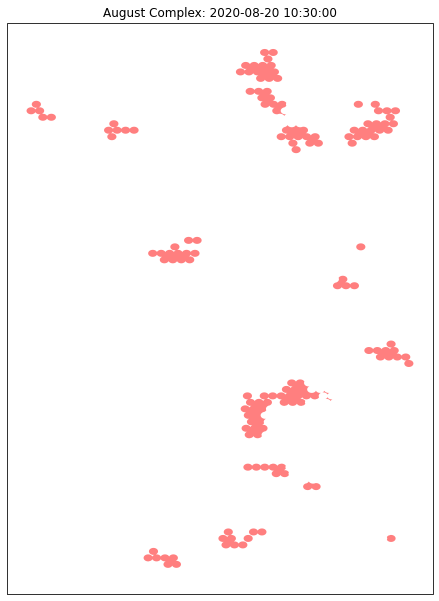

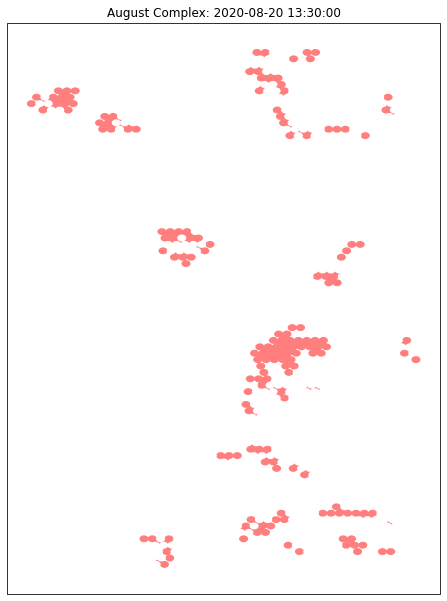

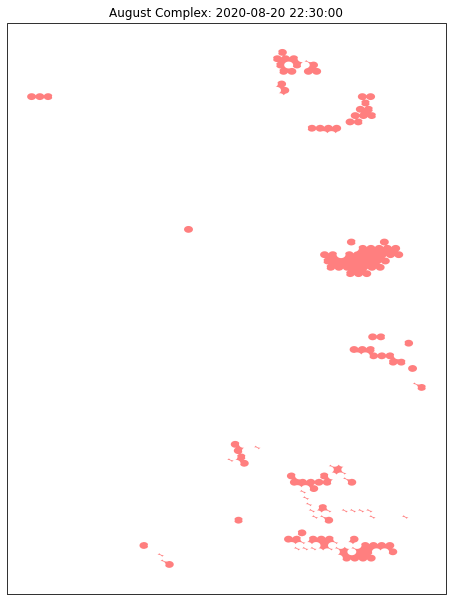

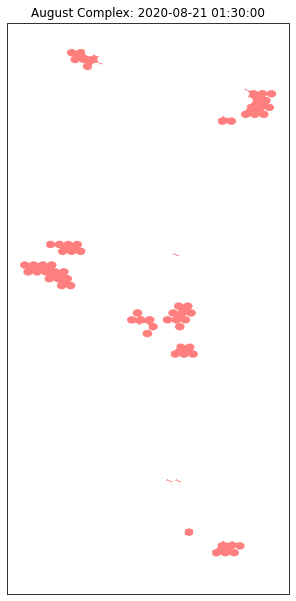

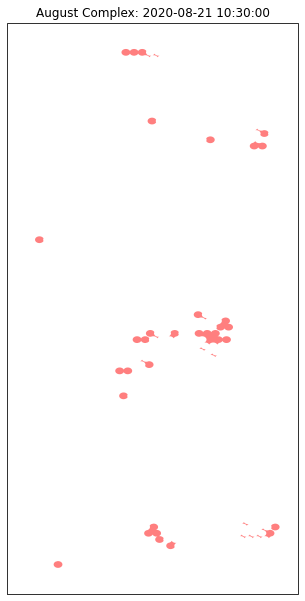

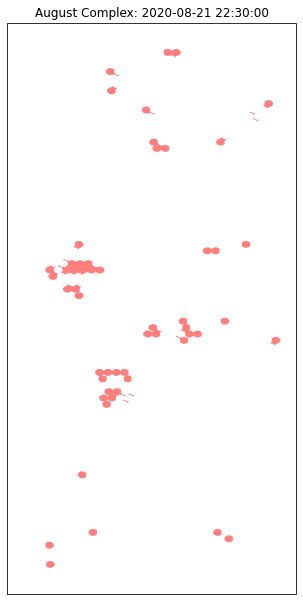

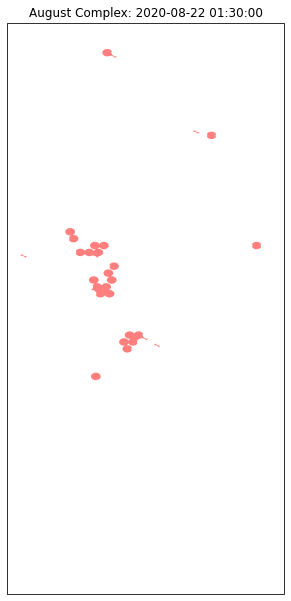

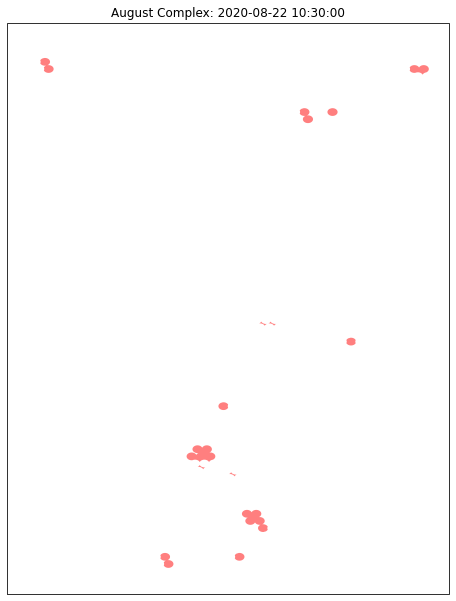

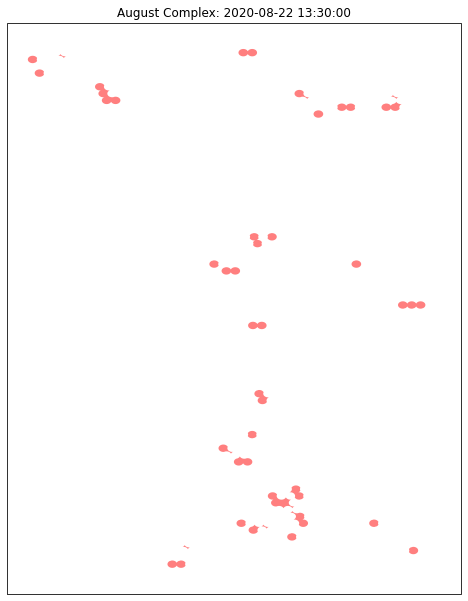

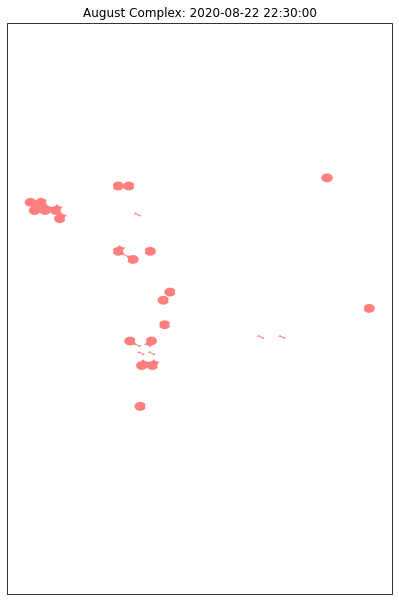

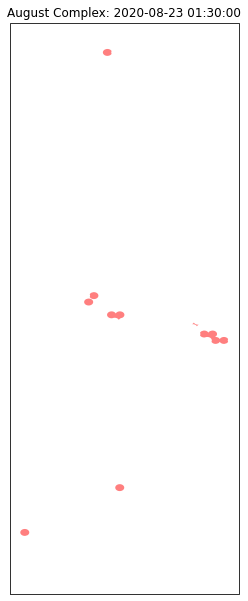

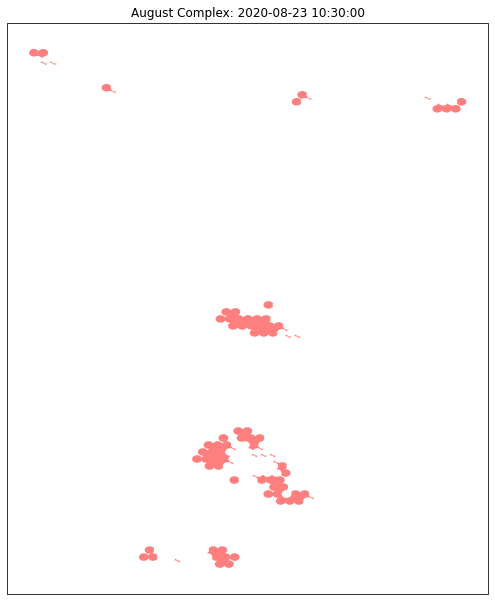

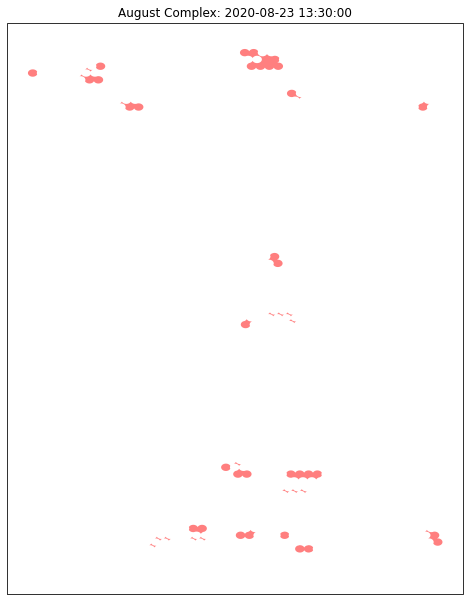

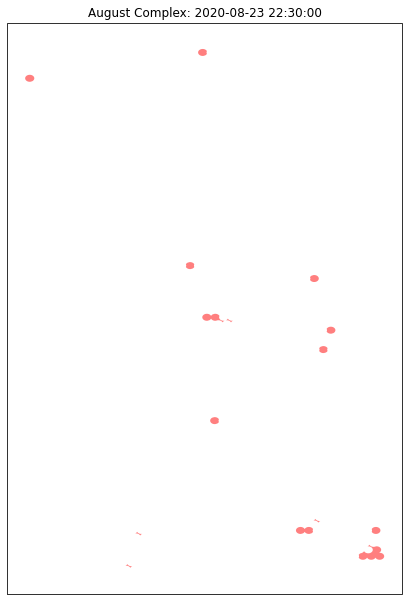

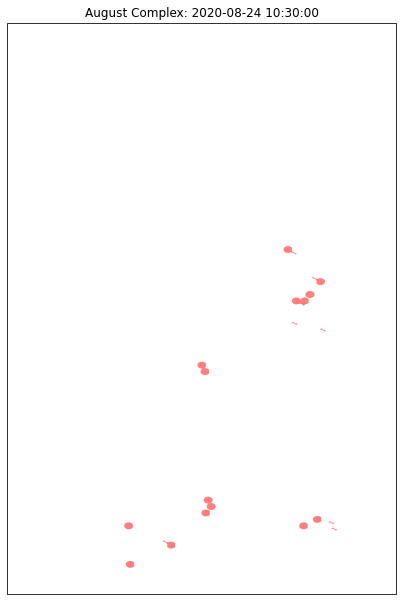

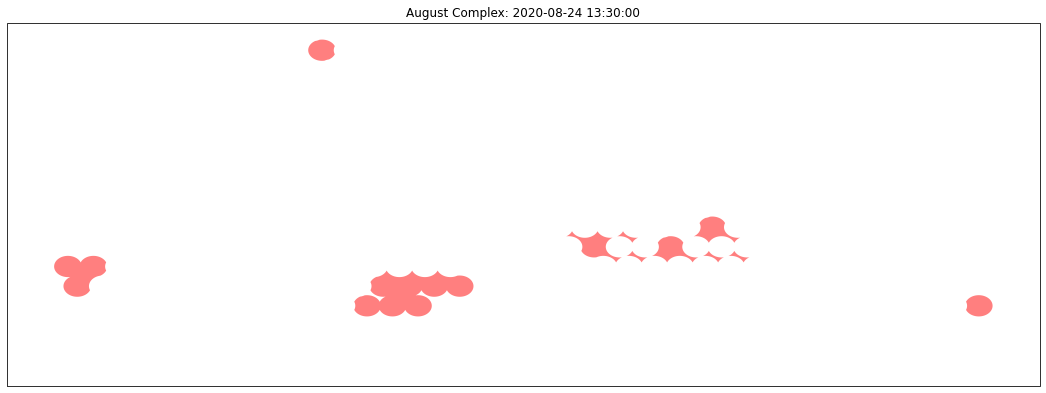

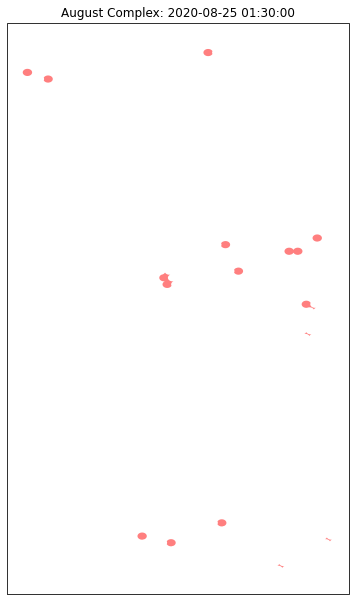

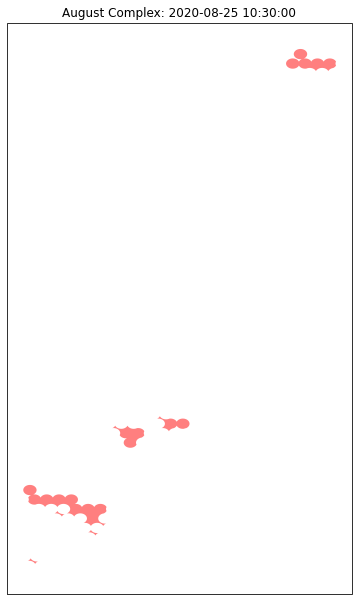

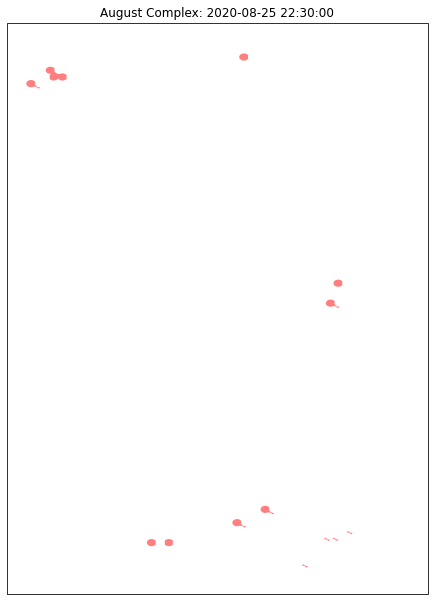

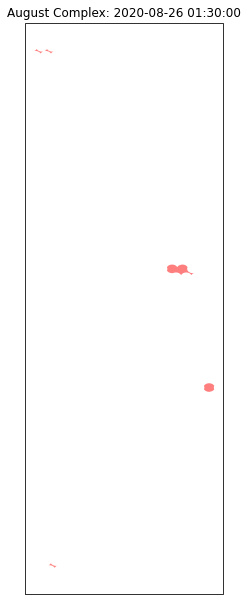

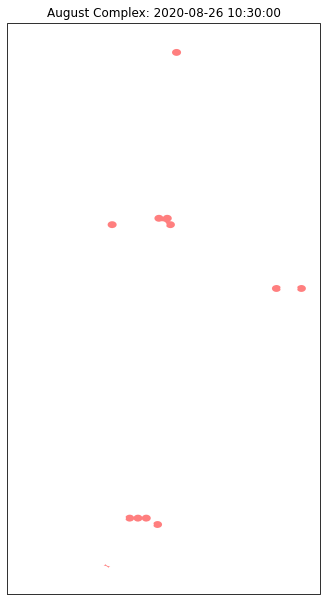

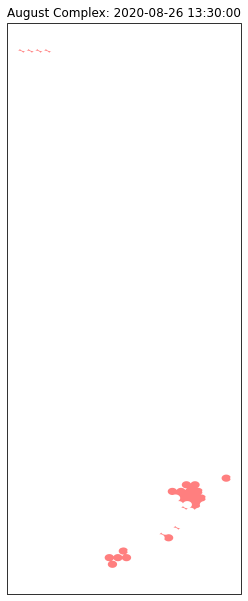

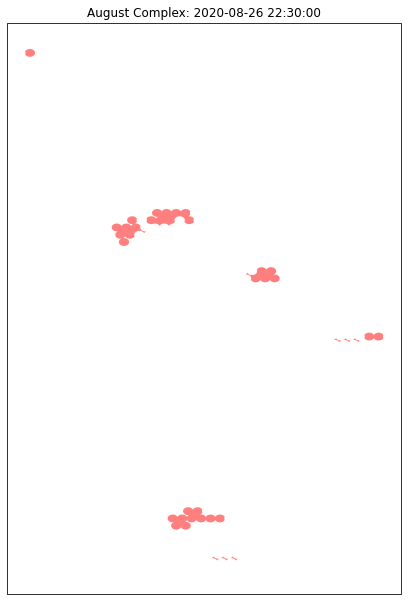

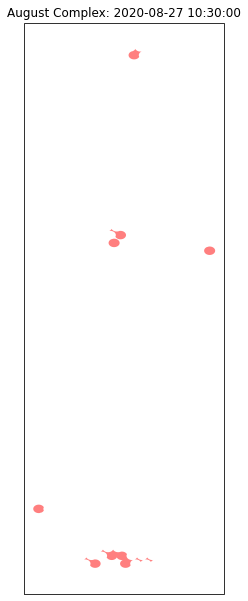

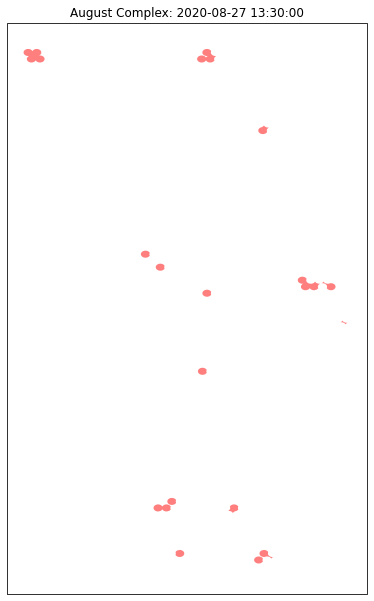

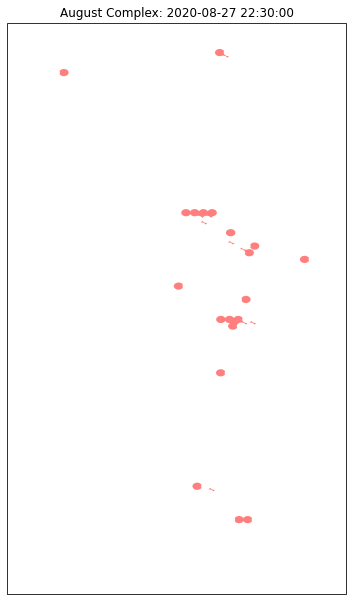

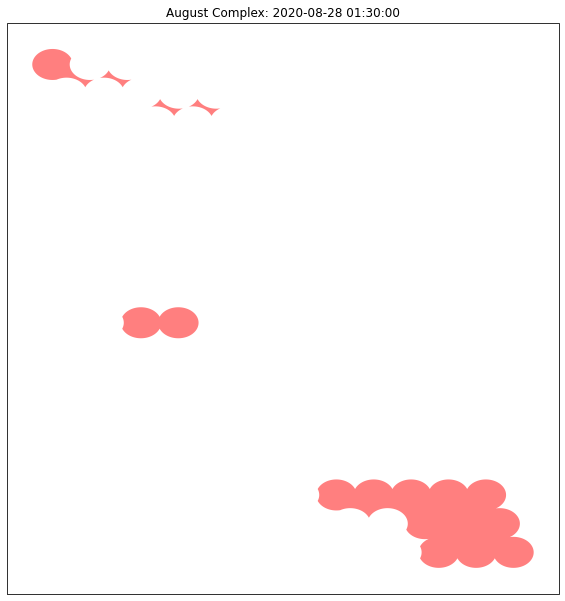

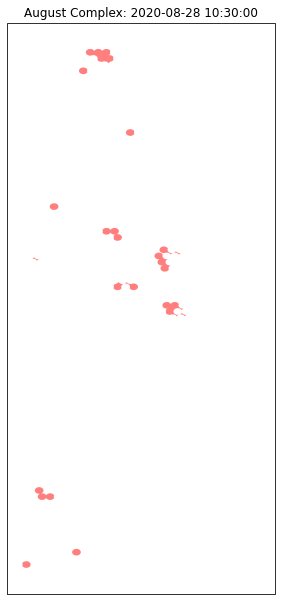

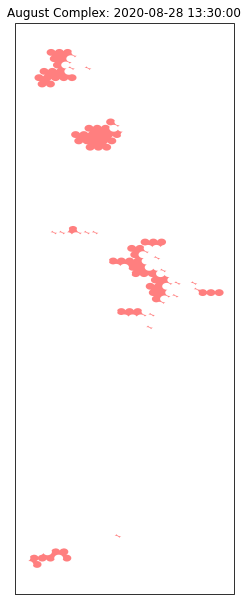

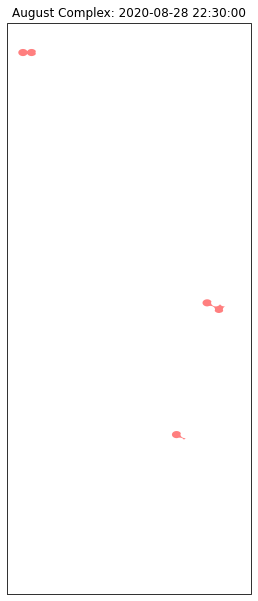

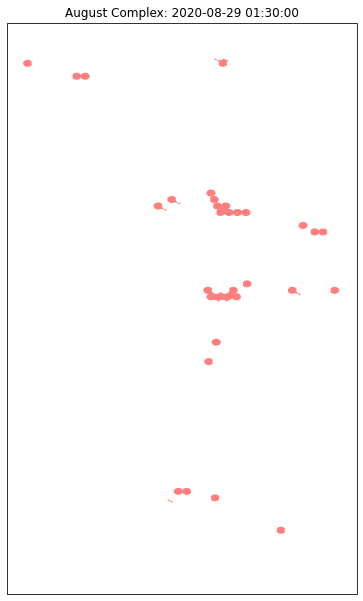

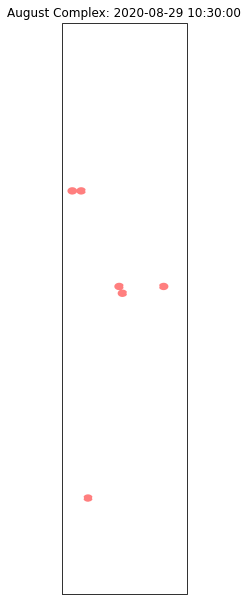

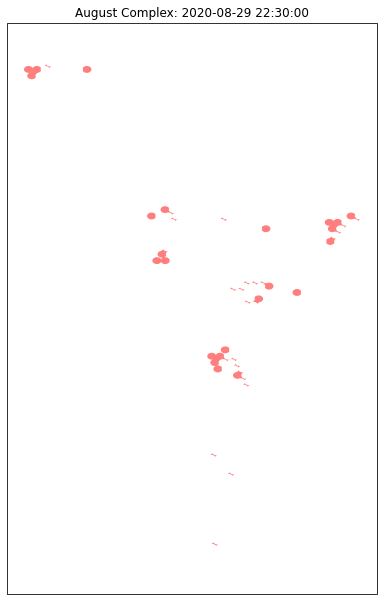

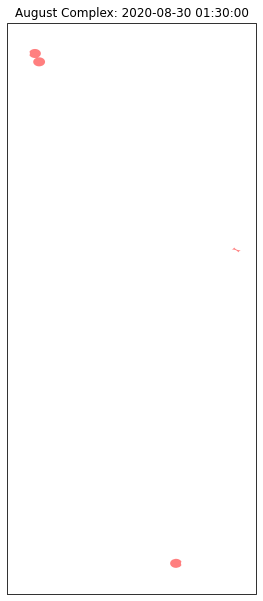

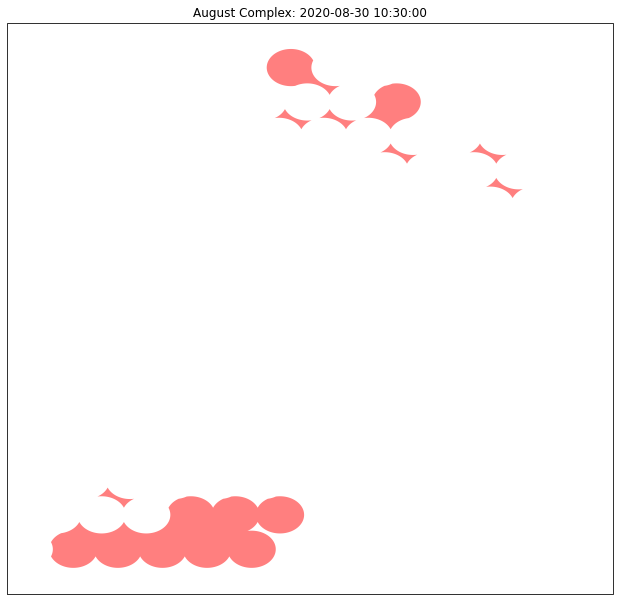

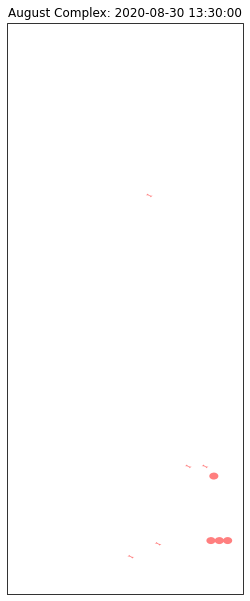

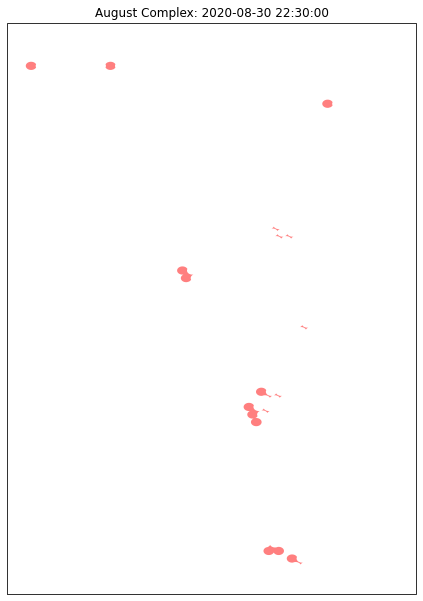

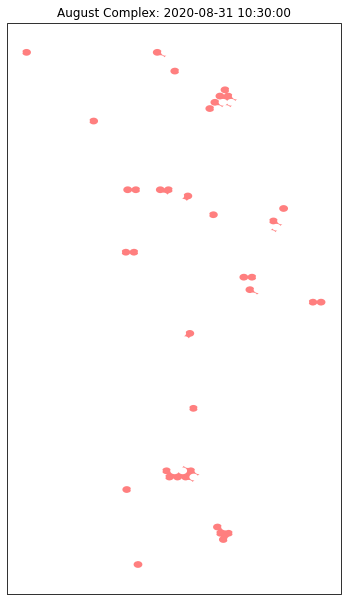

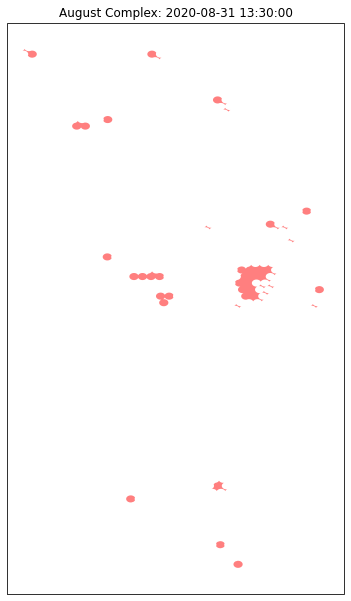

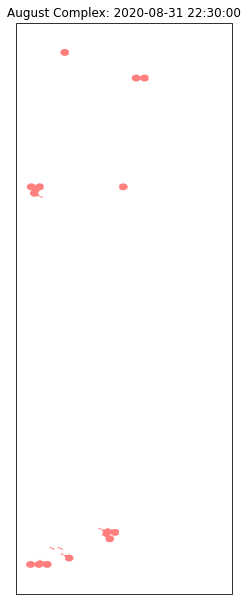

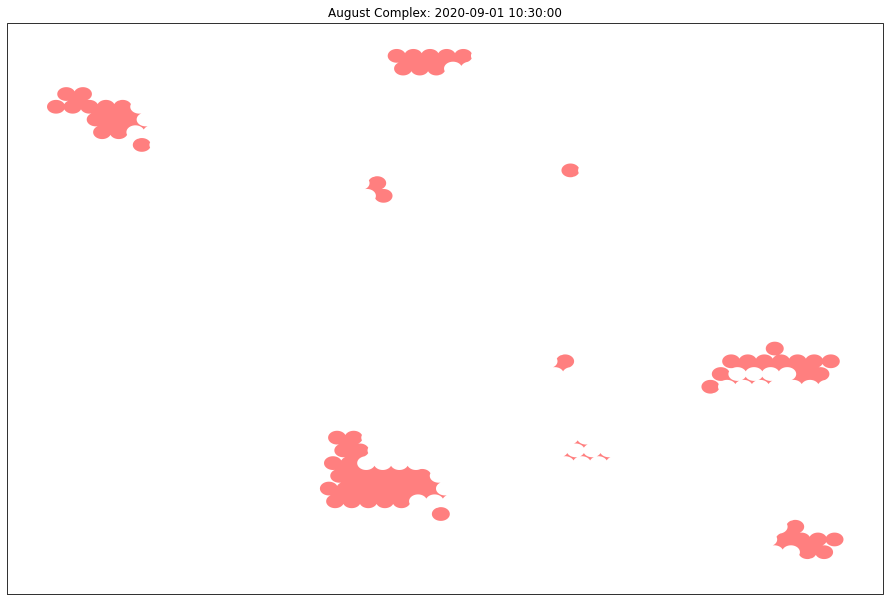

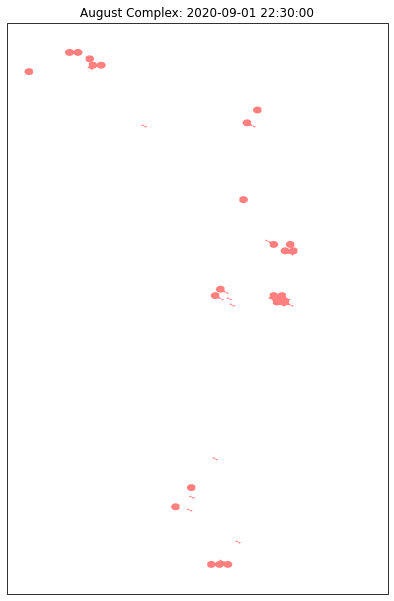

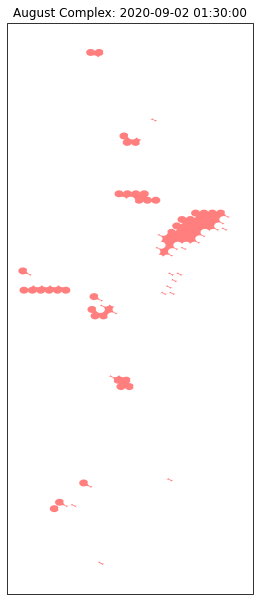

KeyboardInterrupt: 

In [29]:
for ii in range(len(shapefile)):
    final_perim = shapefile['geometry'].iloc[ii]
    fig, axs = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    axs.set_aspect('equal', 'datalim')

    for geom in final_perim.geoms: #loops over all the elements of the multipolygon
        xs,ys = geom.exterior.xy
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.fill(xs, ys, alpha=0.5, fc='r', ec='none')
        ax.coastlines()
        ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
        plt.title('August Complex: '+ shapefile['DateTim'].iloc[ii])
    plt.show()